# Ë∂≥ÈÉ®ÊµãÈáèÁ≥ªÁªü - Âü∫‰∫éA4Á∫∏ÂèÇËÄÉ
# # Ë∂≥ÈÉ®ÊµãÈáèÁ≥ªÁªü

Êú¨È°πÁõÆÂÆûÁé∞Âü∫‰∫éA4Á∫∏ÂèÇËÄÉÁöÑË∂≥ÈÉ®ÊµãÈáèÁ≥ªÁªüÔºåÂåÖÂê´‰ª•‰∏ãÂäüËÉΩÔºö
- A4Á∫∏Ê£ÄÊµãÂíåÈÄèËßÜÊ†°Ê≠£
- Ë∂≥ÈÉ®Âå∫ÂüüÂàÜÂâ≤
- ËΩÆÂªìÊèêÂèñÂíåÊµãÈáèËÆ°ÁÆó
- ÁªìÊûúÂèØËßÜÂåñÂíåÊï∞ÊçÆÂØºÂá∫
<!-- Ê≥®Ôºå‰ΩøÁî®Âπ≤ÂáÄÁôΩÁ∫∏ÔºåÂõæÁâá‰∏≠ÂøÉÊòØËÑöÔºåÈó™ÂÖâÁÅØÊãçÁÖßÊïàÊûú‰ºöÊõ¥Â•Ω -->
# ‰ΩøÁî®ÊñπÊ≥ï
1. Â∞ÜËÑöÂêéË∑üÁ¥ßË¥¥A4Á∫∏ËæπÁºò
2. ‰øØËßÜÊãçÁÖßÔºåÁ°Æ‰øùA4Á∫∏ÂÆåÊï¥ÂÖ•Èïú
3. ËøêË°å‰ª£Á†ÅËøõË°åËá™Âä®Â§ÑÁêÜ

In [1]:
# Ë∂≥ÈÉ®ÊµãÈáèÁ≥ªÁªü - ËæπÁºòÊ£ÄÊµãÊñπÊ≥ï
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
from foot_report import run_shoe_recommendation
from process_foot import process_foot_measurement

# Âä†ËΩΩÊ®°Âûã
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

# ËÆæÁΩÆ‰∏≠ÊñáÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

ÂõæÂÉèÂ∞∫ÂØ∏: (4096, 3072, 3)


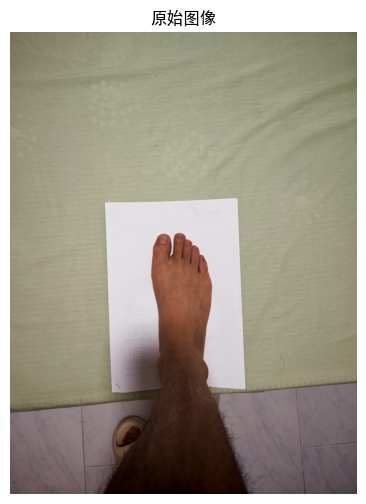

In [2]:
# ËØªÂèñÂõæÂÉè
TEST_IMAGE_PATH = "foot_with_a4_real.jpg"  # ‰øÆÊîπ‰∏∫‰Ω†ÁöÑÂõæÂÉèË∑ØÂæÑ
image = cv2.imread(TEST_IMAGE_PATH)
print(f"ÂõæÂÉèÂ∞∫ÂØ∏: {image.shape}")

# ÊòæÁ§∫ÂéüÂßãÂõæÂÉè
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("ÂéüÂßãÂõæÂÉè")
plt.axis('off')
plt.show()

In [3]:
# ËØªÂèñÂõæÂÉè
image = cv2.imread(TEST_IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

# Ëé∑ÂèñÂõæÂÉèÂ∞∫ÂØ∏Âπ∂ËÆ°ÁÆó‰∏≠ÂøÉÁÇπ
height, width = image.shape[:2]
center_x = width // 2
center_y = height // 2

# ÁÇπÂáªÂõæÂÉè‰∏≠ÂøÉ
input_point = np.array([[center_x, center_y]])  # [x, y] ÂùêÊ†á
input_label = np.array([1])  # 1Ë°®Á§∫ÂâçÊôØÁÇπ

# ÁîüÊàêmask
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)

# ‰øùÂ≠òmask
center_mask = masks[0].astype(np.uint8) * 255
cv2.imwrite("result\center_mask.png", center_mask)
print("‰∏≠ÂøÉÁÇπmaskÂ∑≤‰øùÂ≠òÂà∞ center_mask.png")


‰∏≠ÂøÉÁÇπmaskÂ∑≤‰øùÂ≠òÂà∞ center_mask.png


ÂàÜÂâ≤Âå∫ÂüüÈù¢ÁßØ: 1372638 ÂÉèÁ¥†
ÁΩÆ‰ø°Â∫¶ÂàÜÊï∞: 0.961


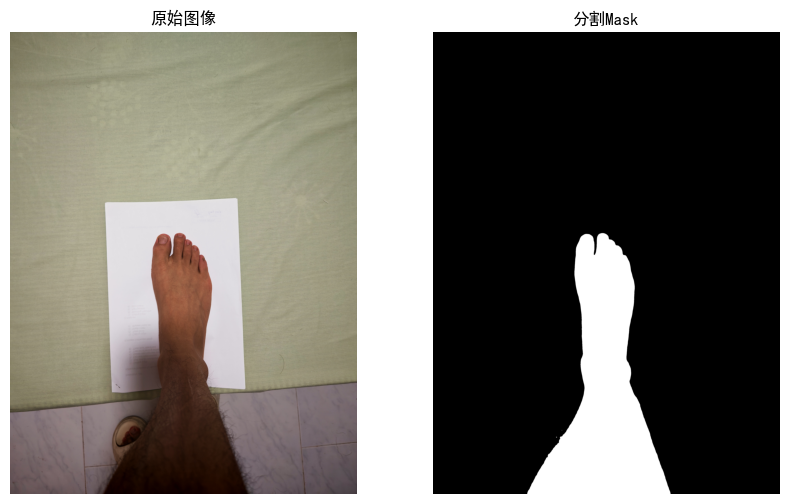

In [4]:
# ÊòæÁ§∫ÁªìÊûú‰ø°ÊÅØ
mask_area = np.sum(masks[0])
print(f"ÂàÜÂâ≤Âå∫ÂüüÈù¢ÁßØ: {mask_area} ÂÉèÁ¥†")
print(f"ÁΩÆ‰ø°Â∫¶ÂàÜÊï∞: {scores[0]:.3f}")
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("ÂéüÂßãÂõæÂÉè")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(masks[0], cmap='gray')
plt.title("ÂàÜÂâ≤Mask")
plt.axis('off')
plt.show()

In [5]:

predictor.set_image(image)

# ‰ΩøÁî®Â∑≤Â≠òÂú®ÁöÑË∂≥ÈÉ®maskÂèòÈáè center_mask
foot_mask = center_mask

# ÊâæÂà∞Ë∂≥ÈÉ®ÁöÑÊúÄÈ°∂Á´Ø‰ΩçÁΩÆ
foot_pixels = np.where(foot_mask > 0)  # ÊâæÂà∞ÊâÄÊúâÁôΩËâ≤ÂÉèÁ¥†
top_y = np.min(foot_pixels[0])  # ÊúÄÂ∞èÁöÑyÂùêÊ†áÂ∞±ÊòØÈ°∂ÈÉ®

# Âú®È°∂ÈÉ®ÊâæÂà∞‰∏≠ÂøÉÁöÑxÂùêÊ†á
top_row_pixels = np.where(foot_mask[top_y, :] > 0)[0]  # È°∂ÈÉ®Ë°åÁöÑÊâÄÊúâxÂùêÊ†á
center_x = int(np.mean(top_row_pixels))  # È°∂ÈÉ®ÁöÑ‰∏≠ÂøÉxÂùêÊ†á

# Âú®Ë∂≥ÈÉ®È°∂ÈÉ®ÂæÄ‰∏ä2‰∏™ÂÉèÁ¥†ÁöÑ‰ΩçÁΩÆÁÇπÂáª
paper_y = max(0, top_y - 20)  # ÂæÄ‰∏ä20ÂÉèÁ¥†ÁÇπÔºå‰ΩÜ‰∏çËÉΩË∂ÖÂá∫ÂõæÂÉèËæπÁïå
paper_point = np.array([[center_x, paper_y]])

print(f"Ë∂≥ÈÉ®È°∂ÈÉ®‰ΩçÁΩÆ: ({center_x}, {top_y})")
print(f"A4Á∫∏ÁÇπÂáª‰ΩçÁΩÆ: ({center_x}, {paper_y})")

# ÁÇπÂáªA4Á∫∏‰ΩçÁΩÆ
input_point = paper_point
input_label = np.array([1])  # 1Ë°®Á§∫ÂâçÊôØÁÇπ

# ÁîüÊàêA4Á∫∏mask
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)

# ‰øùÂ≠òA4Á∫∏mask
a4_mask = masks[0].astype(np.uint8) * 255
cv2.imwrite("result\\a4_mask.png", a4_mask)

print("A4Á∫∏maskÂ∑≤‰øùÂ≠òÂà∞ a4_mask.png")
print(f"A4Á∫∏Âå∫ÂüüÈù¢ÁßØ: {np.sum(masks[0])} ÂÉèÁ¥†")
print(f"ÁΩÆ‰ø°Â∫¶ÂàÜÊï∞: {scores[0]:.3f}")



Ë∂≥ÈÉ®È°∂ÈÉ®‰ΩçÁΩÆ: (1498, 1782)
A4Á∫∏ÁÇπÂáª‰ΩçÁΩÆ: (1498, 1762)
A4Á∫∏maskÂ∑≤‰øùÂ≠òÂà∞ a4_mask.png
A4Á∫∏Âå∫ÂüüÈù¢ÁßØ: 1344662 ÂÉèÁ¥†
ÁΩÆ‰ø°Â∫¶ÂàÜÊï∞: 1.001


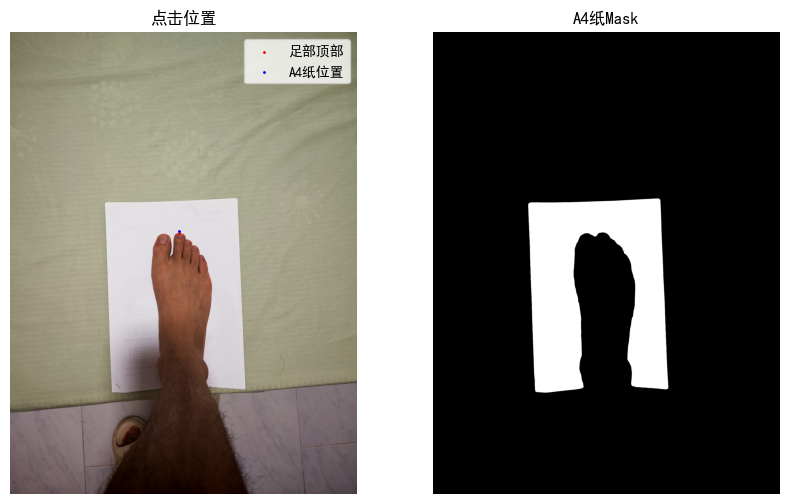

In [6]:
# ÂèØÈÄâÔºöÂèØËßÜÂåñÁÇπÂáª‰ΩçÁΩÆ
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.scatter([center_x], [top_y], c='red', s=1, label='Ë∂≥ÈÉ®È°∂ÈÉ®')
plt.scatter([center_x], [paper_y], c='blue', s=1, label='A4Á∫∏‰ΩçÁΩÆ')
plt.title("ÁÇπÂáª‰ΩçÁΩÆ")
plt.axis('off')
plt.legend()
plt.subplot(1, 2, 2)
plt.imshow(masks[0], cmap='gray')
plt.title("A4Á∫∏Mask")
plt.axis('off')
plt.show()

A4Á∫∏4‰∏™ËßíÁÇπ:
  Â∑¶‰∏ä: (851.0, 1515.0)
  Âè≥‰∏ä: (2007.0, 1481.0)
  Âè≥‰∏ã: (2080.0, 3160.0)
  Â∑¶‰∏ã: (907.0, 3185.0)
ÂÆåÊàêÔºÅ‰øùÂ≠òÂà∞ warped_a4.png


C:\Users\21202\AppData\Local\Temp\ipykernel_35884\2424128049.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


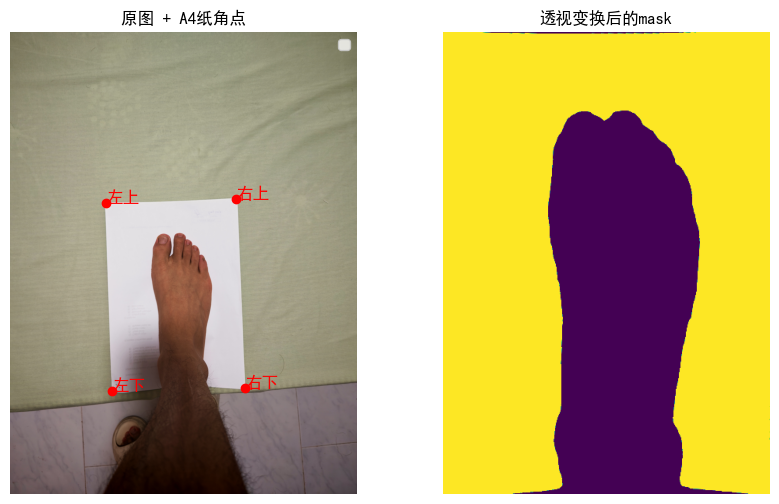

In [7]:

# ÊâæÂà∞A4Á∫∏mask‰∏≠ÊâÄÊúâÁôΩËâ≤ÂÉèÁ¥†ÁöÑÂùêÊ†á
y_coords, x_coords = np.where(a4_mask > 0)

# Áõ¥Êé•ËÆ°ÁÆó4‰∏™ËßíÁÇπ
top_left = [x_coords[np.argmin(x_coords + y_coords)], y_coords[np.argmin(x_coords + y_coords)]]  # x+yÊúÄÂ∞è
top_right = [x_coords[np.argmax(x_coords - y_coords)], y_coords[np.argmax(x_coords - y_coords)]]  # x-yÊúÄÂ§ß
bottom_left = [x_coords[np.argmin(x_coords - y_coords)], y_coords[np.argmin(x_coords - y_coords)]]  # x-yÊúÄÂ∞è
bottom_right = [x_coords[np.argmax(x_coords + y_coords)], y_coords[np.argmax(x_coords + y_coords)]]  # x+yÊúÄÂ§ß

# ÊåâÈ°∫Â∫èÊéíÂàóÔºöÂ∑¶‰∏ä„ÄÅÂè≥‰∏ä„ÄÅÂè≥‰∏ã„ÄÅÂ∑¶‰∏ã
corners = np.array([top_left, top_right, bottom_right, bottom_left], dtype=np.float32)

print("A4Á∫∏4‰∏™ËßíÁÇπ:")
corner_names = ['Â∑¶‰∏ä', 'Âè≥‰∏ä', 'Âè≥‰∏ã', 'Â∑¶‰∏ã']
for corner, name in zip(corners, corner_names):
    print(f"  {name}: ({corner[0]:.1f}, {corner[1]:.1f})")

# ÂÆö‰πâÊñ∞ÂõæÂÉèÂ∞∫ÂØ∏
new_width = 420
new_height = int(new_width * 29.7 / 21)  # A4ÊØî‰æã

# ÁõÆÊ†áËßíÁÇπ
dst_corners = np.array([
    [0, 0],
    [new_width - 1, 0],
    [new_width - 1, new_height - 1],
    [0, new_height - 1]
], dtype=np.float32)

# ÈÄèËßÜÂèòÊç¢
transform_matrix = cv2.getPerspectiveTransform(corners, dst_corners)
warped_image = cv2.warpPerspective(a4_mask, transform_matrix, (new_width, new_height))

# ‰øùÂ≠ò
warped_image_bgr = cv2.cvtColor(warped_image, cv2.COLOR_GRAY2BGR)
warped_a4_path="result\warped_a4.png"  # ‰øÆÊîπ‰∏∫‰Ω†ÊÉ≥‰øùÂ≠òÁöÑË∑ØÂæÑ
cv2.imwrite(warped_a4_path, warped_image_bgr)
print("ÂÆåÊàêÔºÅ‰øùÂ≠òÂà∞ warped_a4.png")

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("ÂéüÂõæ + A4Á∫∏ËßíÁÇπ")
plt.imshow(image)
for corner, name in zip(corners, corner_names):
    plt.plot(corner[0], corner[1], 'ro')
    plt.text(corner[0] + 5, corner[1] - 5, name, color='red', fontsize=12)  
plt.axis('off')
plt.legend()
plt.subplot(1, 2, 2)
plt.imshow(warped_image)
plt.title("ÈÄèËßÜÂèòÊç¢ÂêéÁöÑmask")
plt.axis('off')
plt.show()

üîç Ê≠•È™§1: Ê£ÄÊµãË∂≥ÈÉ®...
‚úÖ Ê£ÄÊµãÂà∞Ë∂≥ÈÉ®ÔºåË∂≥Èïø: 246.0 mm
üîß Ê≠•È™§2: Ê§≠ÂúÜ‰øÆÊ≠£Ë∂≥ÂêéË∑üÂå∫Âüü...
‚úÖ Ê§≠ÂúÜ‰øÆÊ≠£ÂÆåÊàêÔºàË∂≥ÂêéË∑üËµ∑Âßã‰ΩçÁΩÆ: 504pxÔºâ

üìè Ê≠•È™§3: ÊØè5mmÊµãÈáèË∂≥ÂÆΩ...

Ë∑ùËÑöÂ∞ñË∑ùÁ¶ª(mm) | Ë∂≥ÂÆΩ(mm) | Ë∂≥ÂÆΩ(cm)
----------------------------------------
     0.0      |     5.5 |   0.55
     5.0      |    46.0 |   4.60
    10.0      |    52.0 |   5.20
    15.0      |    60.5 |   6.05
    20.0      |    68.0 |   6.80
    25.0      |    75.0 |   7.50
    30.0      |    77.5 |   7.75
    35.0      |    80.5 |   8.05
    40.0      |    84.5 |   8.45
    45.0      |    87.5 |   8.75
    50.0      |    90.0 |   9.00
    55.0      |    91.0 |   9.10
    60.0      |    92.0 |   9.20
    65.0      |    93.0 |   9.30
    70.0      |    94.0 |   9.40
    75.0      |    95.0 |   9.50
    80.0      |    95.5 |   9.55
    85.0      |    95.5 |   9.55
    90.0      |    93.5 |   9.35
    95.0      |    92.0 |   9.20
   100.0      |    91.0 |   9.10
   105.0   

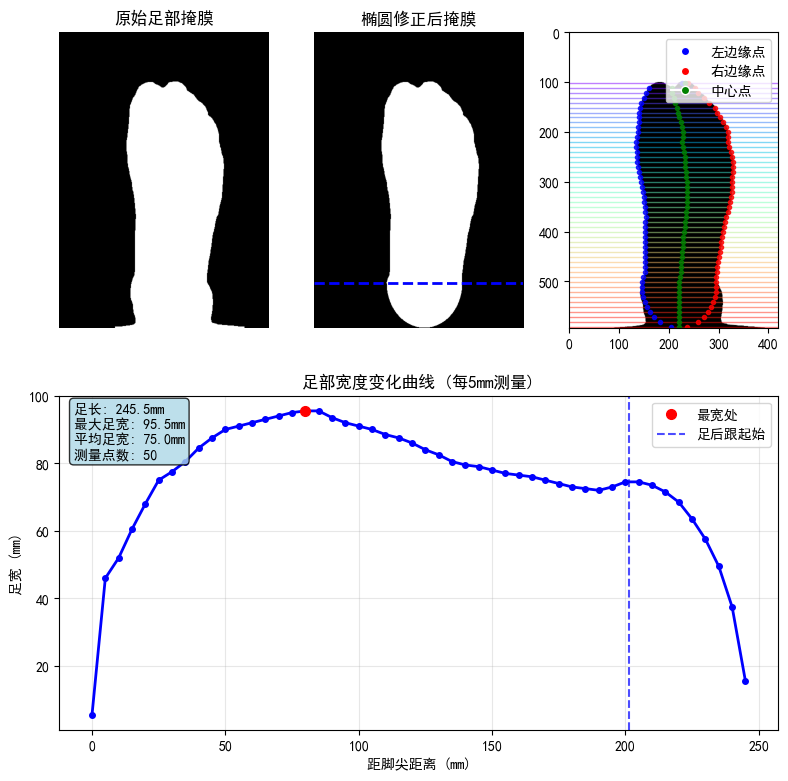

In [8]:
# ËøêË°åÊµãÈáèÂíåÊä•ÂëäÁîüÊàê
results,process_foot_measurement_path = process_foot_measurement(image_path=warped_a4_path, save_results=True)
foot_length_mm = results['foot_length_mm']
foot_width_mm = results['max_width_mm']
print(f"ÊµãÈáèÁªìÊûú - ËÑöÈïø: {foot_length_mm:.1f} mm, ËÑöÂÆΩ: {foot_width_mm:.1f} mm")



Êô∫ËÉΩÈûãÁ†ÅÊé®ËçêÊä•Âëä



üìè ÊµãÈáèÊï∞ÊçÆ:
ËÑöÈïø: 245.5 mm (24.6 cm)
   ËÑöÂÆΩ: 95.5 mm (9.6 cm)

ÂÆΩÈïøÊØî: 0.389

--------------------------------------------------------------------------------

ÂõΩÈôÖÂ∞∫Á†ÅÊé®ËçêË°®:


+------------+------------+-----------------+------------+----------------------+
|    Á±ªÂà´    |    ÂõΩÂÆ∂    |    Êé®ËçêÂ∞∫Á†Å     |  ÂÆΩÂ∫¶Á±ªÂûã  |       ÁâπÂà´Âª∫ËÆÆ       |
+------------+------------+-----------------+------------+----------------------+
|    Áî∑Èûã    |    ‰∏≠ÂõΩ    |      40.0       |     D      |    Âª∫ËÆÆËÄÉËôëÂ§ßÂçäÁ†Å    |
|            |    Ê¨ßÊ¥≤    |      40.0       |            |                      |
|            |    ÁæéÂõΩ    |       7.0       |            |                      |
|            |    Ëã±ÂõΩ    |       6.5       |            |                      |
|            |    Êó•Êú¨    |     25.0cm      |            |                      |
| ---------- | ---------- | --------------- | ---------- | -------------------- 

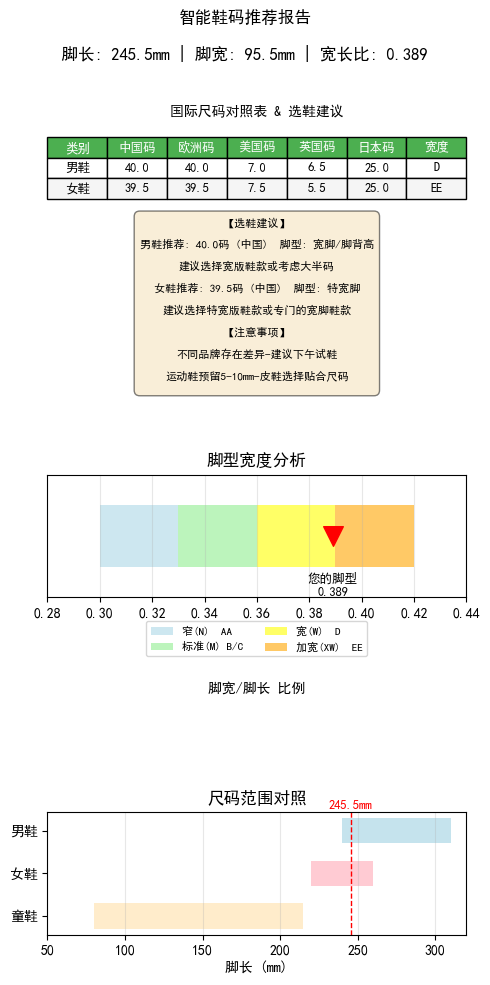

In [9]:
report=run_shoe_recommendation(foot_length_mm, foot_width_mm)

In [10]:
from openai import OpenAI
import json

client = OpenAI(api_key="sk-198343e3213d42e8bc17c259a4398c56", base_url="https://api.deepseek.com")

# ÊûÑÂª∫ÁªìÊûÑÂåñÁöÑÊï∞ÊçÆ
foot_data = {
    "measurement_results": results,
    "analysis_report": report,
    "processing_path": process_foot_measurement_path
}

user_content = f"""
Âü∫‰∫é‰ª•‰∏ãË∂≥ÈÉ®ÊµãËØïÊï∞ÊçÆÔºåËØ∑Êèê‰æõ‰∏ì‰∏öÁöÑÔºö
1. 3DÊâìÂç∞ÈûãÊô∂Ê†ºËÆæËÆ°Âª∫ËÆÆÔºàÂåÖÊã¨ÊùêÊñô„ÄÅÂØÜÂ∫¶ÂàÜÂ∏É„ÄÅÁªìÊûÑÁ±ªÂûãÔºâ
2. ‰∏™ÊÄßÂåñÁöÑËøêÂä®ÂÅ•Â∫∑Âª∫ËÆÆ
3. ÈûãÂÖ∑ÈÄâÊã©ÊåáÂØº

Êï∞ÊçÆËØ¶ÊÉÖÔºö
{json.dumps(foot_data, indent=2, ensure_ascii=False)}
"""

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "‰Ω†ÊòØ‰∏ÄÂêçË∂≥ÈÉ®Áü´ÂΩ¢Â∏àÂíåËøêÂä®Â∫∑Â§ç‰∏ìÂÆ∂ÔºåÊìÖÈïø3DÊâìÂç∞ÈûãÂÖ∑ËÆæËÆ°"},
        {"role": "user", "content": user_content},
    ],
    stream=False,
    temperature=0.7  # ÊéßÂà∂ÂàõÈÄ†ÊÄßÔºåËæÉ‰ΩéÂÄºÊõ¥‰∫ãÂÆûÊÄß
)

print("=" * 50)
print("‰∏ì‰∏öÂª∫ËÆÆÔºö")
print("=" * 50)
print(response.choices[0].message.content)

‰∏ì‰∏öÂª∫ËÆÆÔºö
Ê†πÊçÆÊÇ®Êèê‰æõÁöÑËØ¶ÁªÜË∂≥ÈÉ®ÊµãÈáèÊï∞ÊçÆÔºåÊàëÂ∞Ü‰∏∫ÊÇ®Êèê‰æõ‰∏ì‰∏öÁöÑ3DÊâìÂç∞ÈûãÂÖ∑ËÆæËÆ°Âª∫ËÆÆ„ÄÅËøêÂä®ÂÅ•Â∫∑ÊåáÂØºÂíåÈûãÂÖ∑ÈÄâÊã©Âª∫ËÆÆ„ÄÇ

## 1. 3DÊâìÂç∞ÈûãÊô∂Ê†ºËÆæËÆ°Âª∫ËÆÆ

**ÊùêÊñôÈÄâÊã©Ôºö**
- ‰∏ªË¶ÅÊùêÊñôÔºöTPUÔºàÁÉ≠Â°ëÊÄßËÅöÊ∞®ÈÖØÔºâÔºåÁ°¨Â∫¶Âª∫ËÆÆÂú®85A-95A‰πãÈó¥
- ÊîØÊíëÂå∫ÂüüÔºöÈÄâÊã©ÊÄß‰ΩøÁî®Â∞ºÈæôPA12Â¢ûÂº∫ÂÖ≥ÈîÆÊîØÊíëÈÉ®‰Ωç

**Êô∂Ê†ºÂØÜÂ∫¶ÂàÜÂ∏ÉÁ≠ñÁï•Ôºö**
- **ÂêéË∑üÂå∫Âüü**Ôºà0-60mmÔºâÔºöÈ´òÂØÜÂ∫¶Êô∂Ê†ºÔºà75-85%Â°´ÂÖÖÁéáÔºâÔºåÊèê‰æõÁ®≥ÂÆöÊîØÊíë
- **Ë∂≥ÂºìÂå∫Âüü**Ôºà60-150mmÔºâÔºö‰∏≠Á≠âÂØÜÂ∫¶Ê∏êÂèòÔºà50-70%ÔºâÔºåÂÜÖ‰æßÂØÜÂ∫¶Áï•È´ò‰∫éÂ§ñ‰æß
- **ÂâçÊéåÂå∫Âüü**Ôºà150-245mmÔºâÔºöÂâçÈÉ®‰∏≠Á≠âÂØÜÂ∫¶Ôºà60%ÔºâÔºåË∂æÈ™®Âå∫ÂüüÈôç‰ΩéÂØÜÂ∫¶Ôºà40%Ôºâ‰ª•Êèê‰æõÁÅµÊ¥ªÊÄß
- **ËæπÁºòÂå∫Âüü**ÔºöÂë®ËæπÂØÜÂ∫¶Â¢ûÂä†5-10%‰ª•Êèê‰æõ‰æßÂêëÊîØÊíë

**ÁªìÊûÑÁ±ªÂûãÂª∫ËÆÆÔºö**
- ‰ΩøÁî®**Ê∏êÂèòÂºèÂÖ≠ËæπÂΩ¢Êô∂Ê†ºÁªìÊûÑ**ÔºåÂú®È´òÂéãÂå∫ÂüüÈááÁî®Êõ¥Â∞èÁöÑÊô∂Ê†ºÂçïÂÖÉ
- Ë∂≥ÂºìÂÜÖ‰æßÈááÁî®**Âä†Âº∫Á≠ãÁªìÊûÑ**Êèê‰æõÈ¢ùÂ§ñÊîØÊíë
- ÂâçÊéåÂå∫ÂüüÈááÁî®**ÂêÑÂêëÂºÇÊÄßÊô∂Ê†º**ÔºåÁ°Æ‰øùÂâçÂêéÂºØÊõ